### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import torch

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
lterdf = pd.read_csv('./archive/penguins_lter.csv')
sizedf = pd.read_csv('./archive/penguins_size.csv')

In [3]:
sizedf.dropna(inplace = True)
display(sizedf)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Visualizing data

In [4]:
# drops island feature
sizedf = sizedf.drop(columns = ['island'], axis = 1)
le = LabelEncoder()

# discretize categorical variables
sizedf['sex'] = le.fit_transform(sizedf['sex'])
sizedf['species'] = le.fit_transform(sizedf['species'])

In [5]:
display(sizedf)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,2
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
4,0,36.7,19.3,193.0,3450.0,1
5,0,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0,1
340,2,46.8,14.3,215.0,4850.0,1
341,2,50.4,15.7,222.0,5750.0,2
342,2,45.2,14.8,212.0,5200.0,1


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000e+00,0.729262,0.740803,0.851351,0.751020,1.625802e-17
culmen_length_mm,7.292618e-01,1.000000,0.228640,0.652126,0.589066,3.386764e-01
culmen_depth_mm,7.408034e-01,0.228640,1.000000,0.578730,0.472987,3.740342e-01
flipper_length_mm,8.513508e-01,0.652126,0.578730,1.000000,0.873211,2.411210e-01
body_mass_g,7.510201e-01,0.589066,0.472987,0.873211,1.000000,4.115305e-01
sex,1.625802e-17,0.338676,0.374034,0.241121,0.411531,1.000000e+00


<Figure size 1000x1000 with 0 Axes>

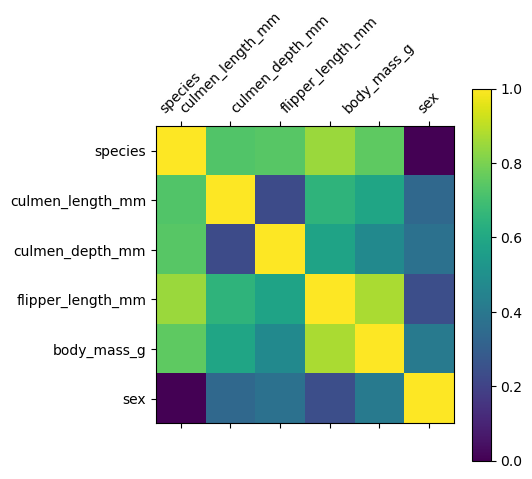

In [6]:
size_cov = sizedf.corr()
size_cov_abs = size_cov.apply(lambda x: np.abs(x), axis = 1)
display(size_cov_abs)
plt.figure(figsize = (10, 10))
plt.matshow(size_cov_abs)
plt.xticks(ticks = [i for i in range(6)], labels = size_cov.columns.to_numpy(), 
           rotation = 45)
plt.yticks(ticks = [i for i in range(6)], labels = size_cov.columns.to_numpy())
plt.colorbar()

'species' bears no correlation with 'sex.' species-culmen features are similar but are no correlated amongst themselves. body_mass-flipper_len correlation is quite high

Want to look at the statistics for each species groups 

In [7]:
# scale and normalize features?
features_by_species = sizedf.groupby('species')
mean_by_species = features_by_species.mean()
std_by_species = features_by_species.std()

display(features_by_species)

In [8]:
mean_by_species['body_mass_g']

species
0    3706.164384
1    3733.088235
2    5090.625000
Name: body_mass_g, dtype: float64

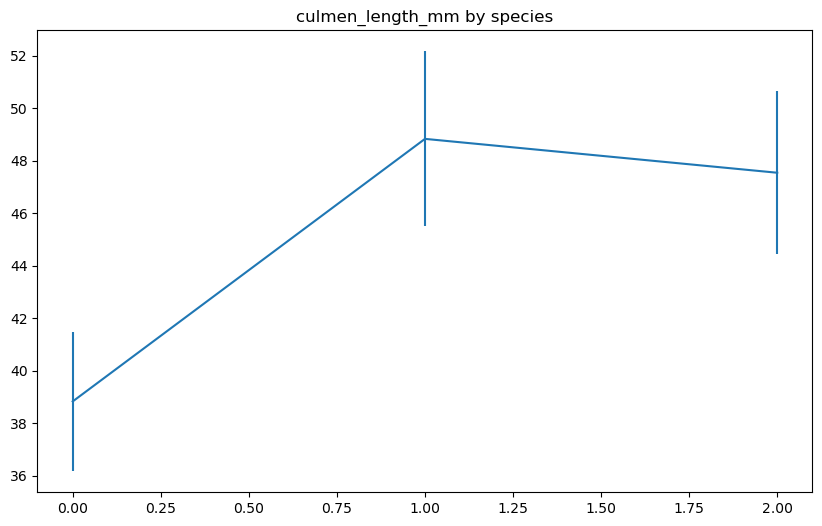

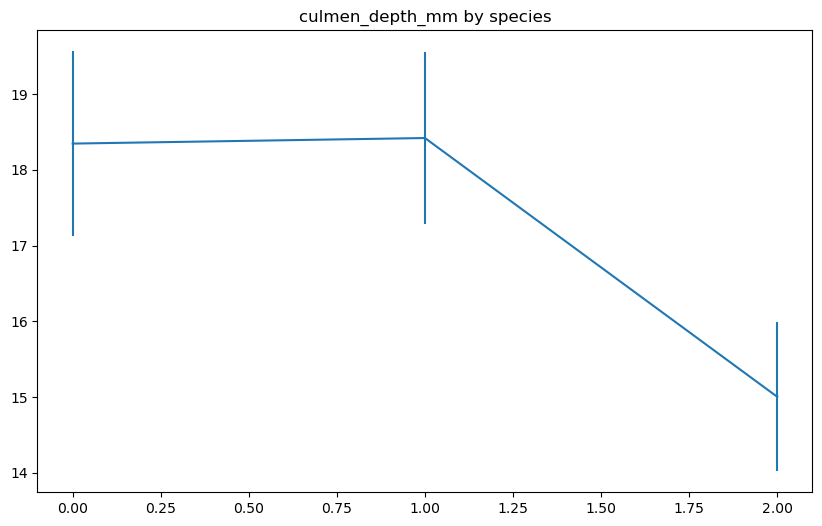

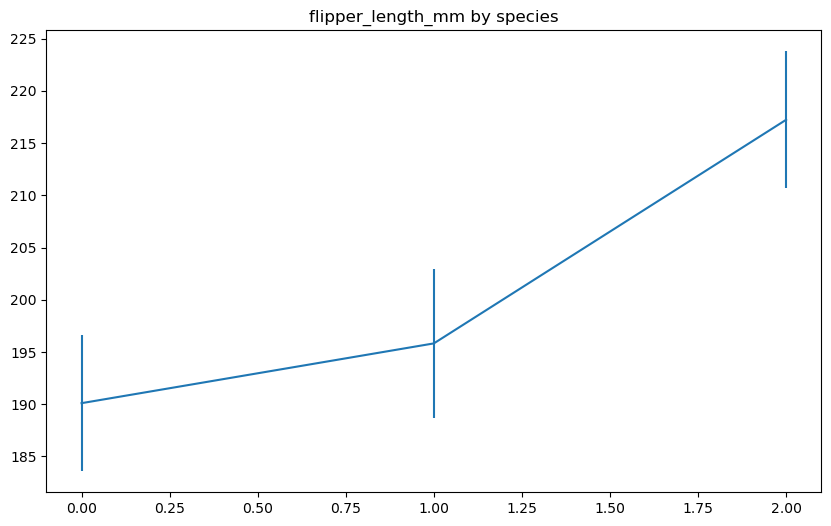

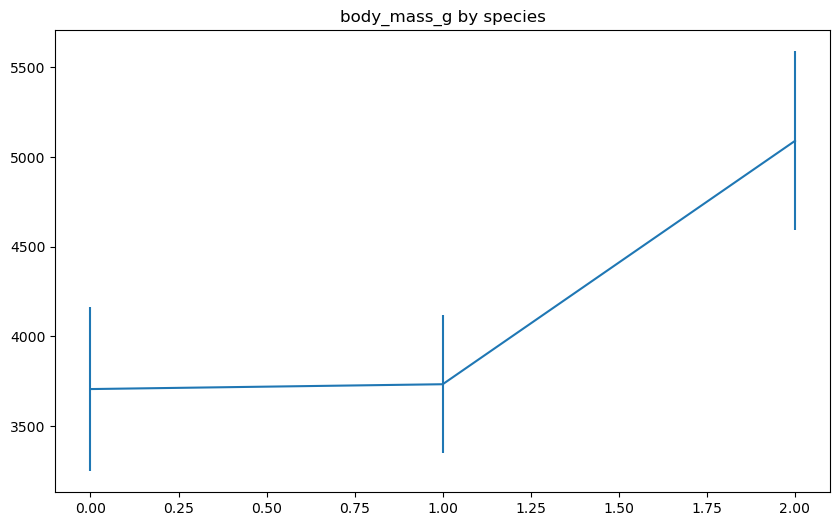

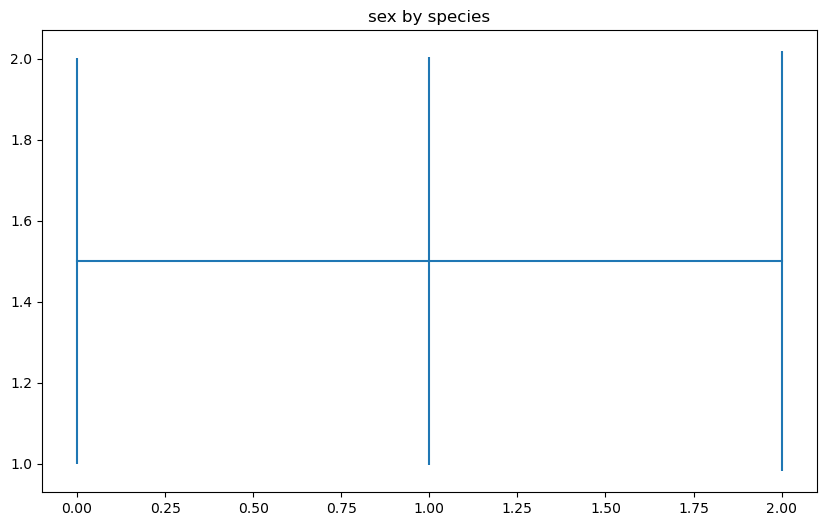

In [9]:
for f in mean_by_species.columns:
    mean = mean_by_species[f]
    std = std_by_species[f]

    plt.figure(figsize = (10, 6))
    plt.errorbar(mean.index, mean, yerr = std)
    plt.title(f"{f} by species")


In [10]:
# dropping 'sex' column due to its low utility
size_x = sizedf.drop(columns = ['sex', 'species']).copy()
size_y = sizedf['species'].copy().values

In [11]:
display(size_x.columns.values)

array(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'], dtype=object)

### Define Preprocessor

In [12]:
# applying a column scaler to normalize features
preprocessor = ColumnTransformer(
    transformers = [('norm', StandardScaler(), size_x.columns.values)],
    remainder = 'passthrough'
)

### Define DecisionTree Model

In [13]:
def gini_index() -> float:
    pass

def entropy() -> float:
    pass

def misclassification() -> float:
    pass

In [53]:
class TestClass():
    shared = 0
    def __init__(self, cond):
        self.x = 0
        self.y = 0
        if cond:
            self.alpha = 2
            self.beta = 4
            
    def check(self, question):
        if self.x < question:
            print("hello")
    def update_shared(delta):
        TestClass.shared +=delta
            
    def show_shared():
        print(TestClass.shared)
        
            
            
a = TestClass(False)
TestClass.update_shared(2)
TestClass.show_shared()
b = TestClass(True)
TestClass.update_shared(10)
TestClass.show_shared()

2
12


In [23]:
size_x['culmen_depth_mm'].unique()

array([18.7, 17.4, 18. , 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 19. ,
       20.7, 18.4, 21.5, 18.3, 19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 16.7,
       17. , 20. , 18.5, 19.1, 19.7, 16.9, 18.8, 17.7, 19.5, 17.5, 16.6,
       18.2, 17.1, 16.2, 19.4, 16.8, 16.1, 20.3, 17.3, 16. , 16.5, 20.5,
       19.8, 15.9, 20.1, 15.5, 19.9, 20.8, 16.4, 13.2, 16.3, 14.1, 15.2,
       14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 15.7, 15.1, 14.3, 15.8,
       13.1, 15. , 14.2, 14.8, 13.6, 13.9, 13.3, 14.4, 13.8, 14.9, 15.6,
       14. , 14.7])

In [33]:
x = size_x['culmen_depth_mm'] < 15
y = size_x['culmen_depth_mm'] >= 15
display(size_x['culmen_depth_mm'] < 15)

# display(size_x[1, 5, 23, 2, 5])
display(len(x))
display(len(y))

0      False
1      False
2      False
4      False
5      False
       ...  
338     True
340     True
341    False
342     True
343    False
Name: culmen_depth_mm, Length: 334, dtype: bool

334

334

In [ ]:
class CustomDecisionTree():

    def __init__(self, min_leaf = 0, max_depth = 0, cost_func = misclassification):
        self.min_leaf = min_leaf
        self.max_depth = max_depth
        self.cost_func = cost_func
        
        pass
    
    def predict():
        pass
    
    def predict_proba():
        pass
    
    def _fit_tree(self, node):
        if node.depth > self.max_depth and node.data.shape[0]:
            
            # perform greedy test
            cost, split_feature, split_threshold = CustomDecisionTree._greedy_test(node, self.cost_func)
            
            
            
            
        
    
    def _greedy_test(node, cost_func):
        min_cost = torch.inf
        optimal_feature = None
        optimal_threshold = None
        df = node.data
        node_features = df.shape[1]
        
        # iterate through all features and their thresholds
        
        for i in range(node_features):
            feature = df.columns[i]
            threshold_candidates = node.data[feature].unique()
            for threshold in threshold_candidates:
                # split node data into left and right
                left_idxs = df[feature] > threshold
                right_idxs = df[feature] <= threshold
                
                # skip if partition does nothing
                if len(left_idxs) == 0 or len(right_idxs) == 0:
                    continue
                
                # compute costs on each side
                left_cost = cost_func(df[left_idxs][feature])
                right_cost = cost_func(df[right_idxs][feature])
                
                # compute weighted cost
                n_left = len(left_idxs)
                n_right = len(right_idxs)
                cost = (n_left/(n_left+n_right)) * left_cost + (n_right/(n_left+n_right)) * right_cost
                if cost < min_cost:
                    min_cost = cost
                    optimal_feature = feature
                    optimal_threshold = threshold
                    
        return min_cost, optimal_feature, optimal_threshold
                
                
                
        
class Node():
    def __init__(self, parent):
        self.left = None,
        self.right = None,
        self.split_value = None,
        self.split_threshold = None,
        self.data_indices = None,
        self.data = None,
        self.depth = 0
        self.features = None
        self.labels = None
        if parent:
            self.depth = parent.depth
            

SyntaxError: non-default argument follows default argument (1898047922.py, line 3)

### First Training Loop

[{}, {}, {}, {}, {}]

0.9824561403508771

0.9824561403508771

0.9298245614035088

0.9464285714285714

0.9642857142857143

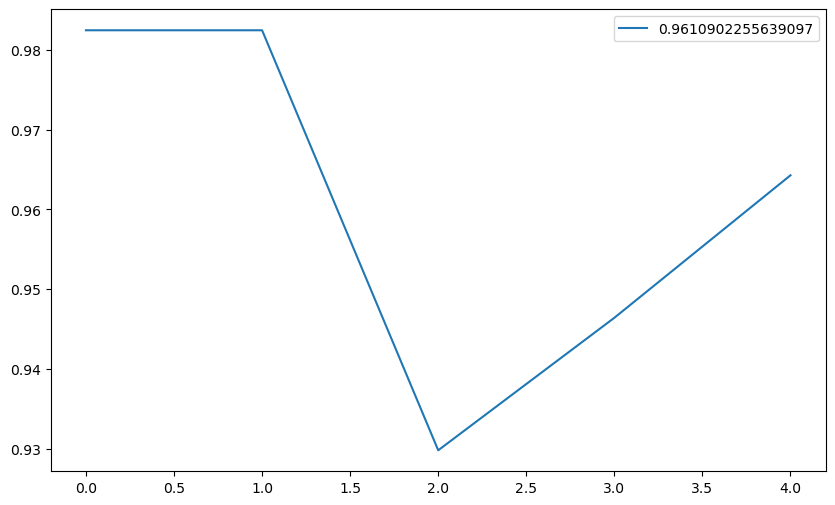

In [ ]:
# vars
num_folds = 5
test_split_p = 0.15

# setup classifier
dt_classifier = tree.DecisionTreeClassifier()

# init splits and folds
X_train, X_test, Y_train, Y_test = train_test_split(
    size_x, size_y, test_size = test_split_p, random_state = 0)

kf = KFold(shuffle = True, random_state = 0, n_splits = num_folds)

# store predictions
fold_performances = [{} for _  in range(num_folds)]
fold_accs = []
display(fold_performances)

# iterate through folds
for i, (train_idx, val_idx) in enumerate(kf.split(X_train, Y_train)):
    # process training dataset
    infold_features = X_train.iloc[train_idx]
    infold_features_proc = torch.tensor(
        preprocessor.fit_transform(infold_features)
    )
    infold_labels = Y_train[train_idx]

    # train with model with infold
    dt_classifier.fit(infold_features_proc, infold_labels)

    # process validation fold
    outfold_features = X_train.iloc[val_idx]
    outfold_features_proc = torch.tensor(
        preprocessor.fit_transform(outfold_features)
    )
    outfold_labels = Y_train[val_idx]

    # do prediction on outfold
    preds = dt_classifier.predict(outfold_features_proc)
    
    # evluate accuracy
    val_acc = np.sum([1 for i, j in zip(preds, outfold_labels) if i == j])/len(preds)
    display(val_acc)
    fold_accs.append(val_acc)
avg_acc = np.mean(fold_accs)
plt.figure(figsize = (10, 6))
plt.plot(
    [i for i in range(num_folds)],
    [fold_accs[i] for i in range(num_folds)],
    label = f"{avg_acc}"
)
plt.legend()